In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the path to the dataset folder
dataset_path = '/content/drive/My Drive/brain_tumor_dataset/'



In [1]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [5]:
from sklearn.model_selection import train_test_split
import os
import shutil

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define paths to your dataset
dataset_dir = '/content/drive/My Drive/brain_tumor_dataset/'  # Change this to your dataset directory
# List subdirectories (class labels)
class_labels = ['yes', 'no']

# Define paths for training and validation directories
train_dir = '/content/train'
validation_dir = '/content/validation'

# Create directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

# Split dataset and copy files for each class
for label in class_labels:
    class_dir = os.path.join(dataset_dir, label)

    # Get list of filenames in class directory
    filenames = os.listdir(class_dir)

    # Split filenames into training and validation sets
    train_filenames, validation_filenames = train_test_split(filenames, test_size=0.2, random_state=42)

    # Create directories for class in training and validation directories
    train_label_dir = os.path.join(train_dir, label)
    validation_label_dir = os.path.join(validation_dir, label)
    os.makedirs(train_label_dir, exist_ok=True)
    os.makedirs(validation_label_dir, exist_ok=True)

    # Copy training images to train directory
    for filename in train_filenames:
        src = os.path.join(class_dir, filename)
        dst = os.path.join(train_label_dir, filename)
        shutil.copyfile(src, dst)

    # Copy validation images to validation directory
    for filename in validation_filenames:
        src = os.path.join(class_dir, filename)
        dst = os.path.join(validation_label_dir, filename)
        shutil.copyfile(src, dst)

print("Dataset split and copied successfully.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset split and copied successfully.


In [28]:
epochs = 20
batch_size = 8
img_width, img_height = 150, 150


train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')  # Change to 'categorical' if you have more than two classes

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 202 images belonging to 2 classes.
Found 51 images belonging to 2 classes.


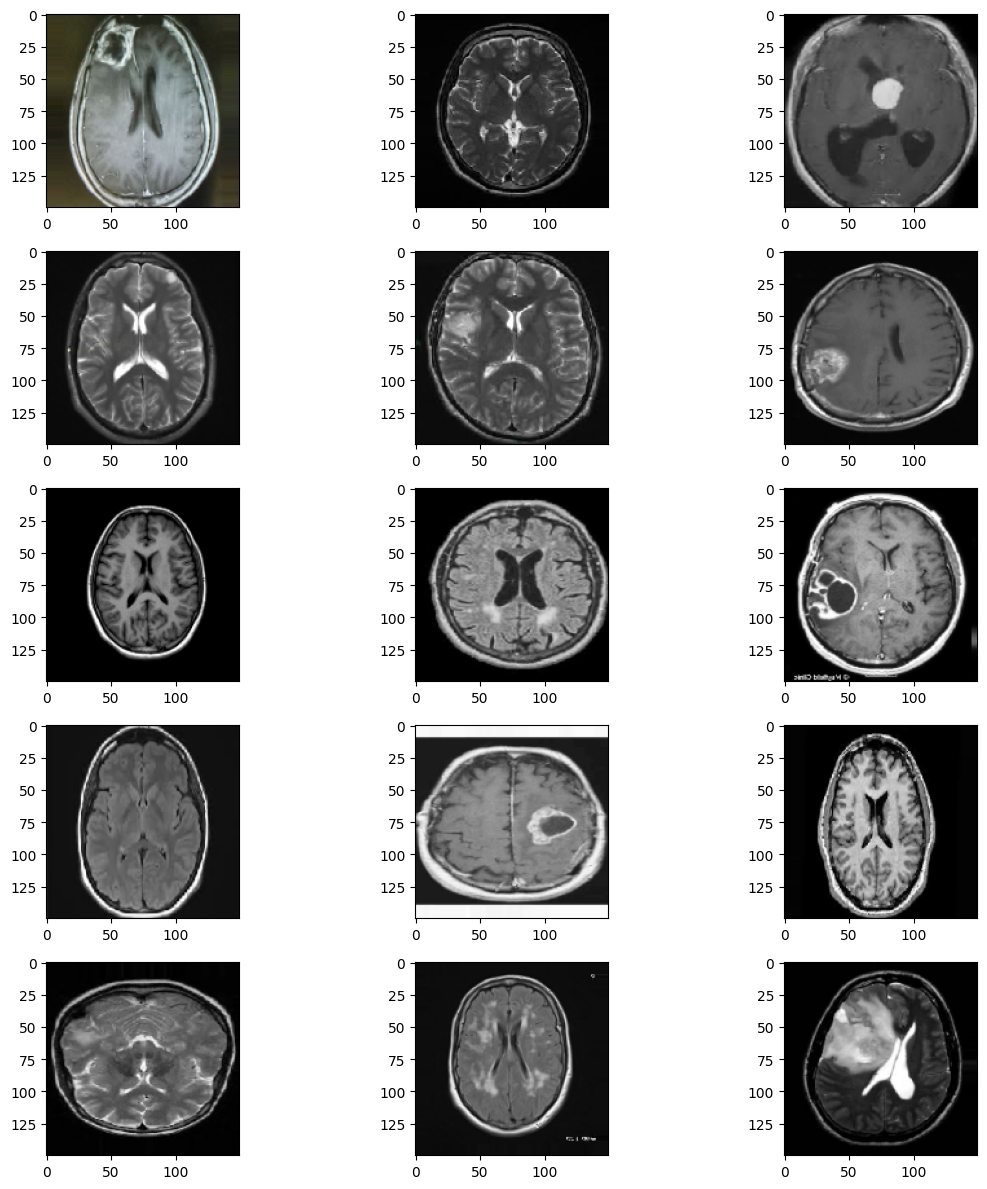

In [29]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialize a Sequential model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

In [34]:
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // batch_size)


Epoch 1/20
25/25 [==============================] - 13s 385ms/step - loss: 0.5989 - accuracy: 0.6959 - val_loss: 0.5133 - val_accuracy: 0.7500
Epoch 2/20
25/25 [==============================] - 11s 444ms/step - loss: 0.5537 - accuracy: 0.7371 - val_loss: 0.5690 - val_accuracy: 0.7292
Epoch 3/20
25/25 [==============================] - 11s 442ms/step - loss: 0.5804 - accuracy: 0.7474 - val_loss: 0.5533 - val_accuracy: 0.6875
Epoch 4/20
25/25 [==============================] - 10s 369ms/step - loss: 0.4951 - accuracy: 0.7887 - val_loss: 0.5472 - val_accuracy: 0.6875
Epoch 5/20
25/25 [==============================] - 11s 421ms/step - loss: 0.4492 - accuracy: 0.8247 - val_loss: 0.5904 - val_accuracy: 0.7292
Epoch 6/20
25/25 [==============================] - 10s 407ms/step - loss: 0.3715 - accuracy: 0.8299 - val_loss: 0.5838 - val_accuracy: 0.7083
Epoch 7/20
25/25 [==============================] - 10s 376ms/step - loss: 0.4226 - accuracy: 0.7938 - val_loss: 0.5297 - val_accuracy: 0.6875

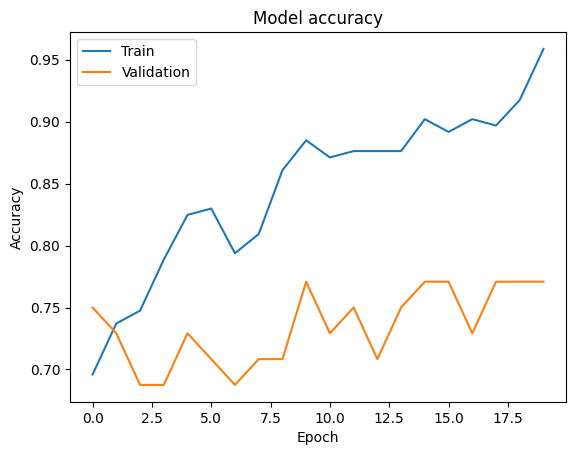

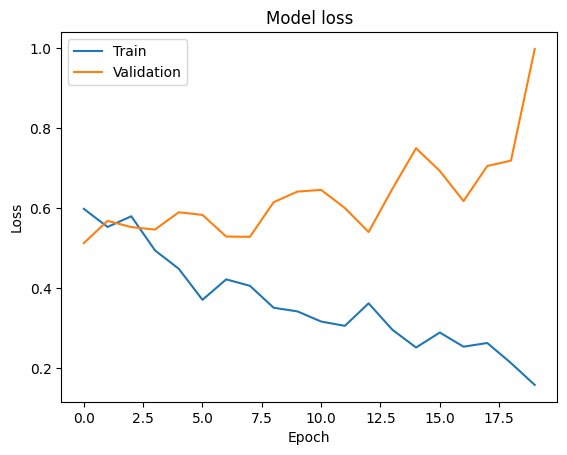

In [36]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [40]:
# Print training accuracy
print("Training accuracy:", history.history['accuracy'][-1])

# Print validation accuracy
print("Validation accuracy:", history.history['val_accuracy'][-1])


Training accuracy: 0.9587628841400146
Validation accuracy: 0.7708333134651184
